<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parameter-exploration" data-toc-modified-id="Parameter-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parameter exploration</a></span></li><li><span><a href="#Graph-generation" data-toc-modified-id="Graph-generation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Graph generation</a></span></li><li><span><a href="#Repair-Generation" data-toc-modified-id="Repair-Generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Repair Generation</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
from igr import *

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

# Parameter exploration


Generate Ground Truth for a variety of parameters :

*   V size = [10, 20, 100]
*   V density = [1, 1.5, 2, 3], impacts number of dependencies for each label
*   L/V ratio = [0.2, 0.4, 0.6, 1], possible diversity of labels
*   L density = [1, 1.5, 2, 3], low L density implies stricter dependencies



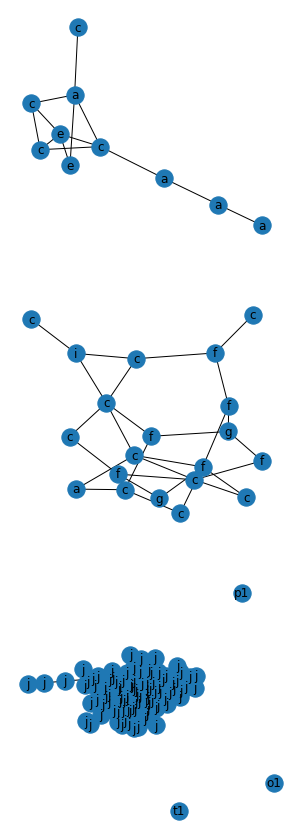

In [5]:
G_10,S_10 = generate_GS(v_size=10)
G_20,S_20 = generate_GS(v_size=20)
G_100,S_100 = generate_GS(v_size=100)
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (5,15))
draw_G(G_10,S_10, ax=ax1)
draw_G(G_20,S_20, ax=ax2)
draw_G(G_100,S_100, ax=ax3)

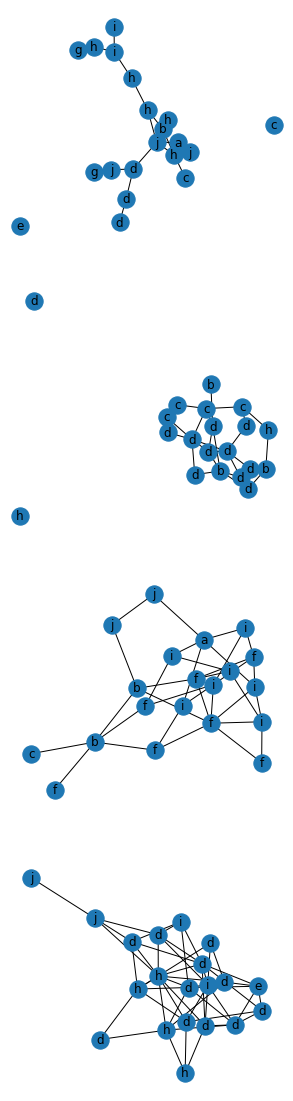

In [6]:
v_densities = [1, 1.5, 2, 3]
fig, axs = plt.subplots(4, figsize = (5,20))

for i in range(len(v_densities)):
  G,S = generate_GS(v_size=20, v_density= v_densities[i])
  draw_G(G,S, ax=axs[i])

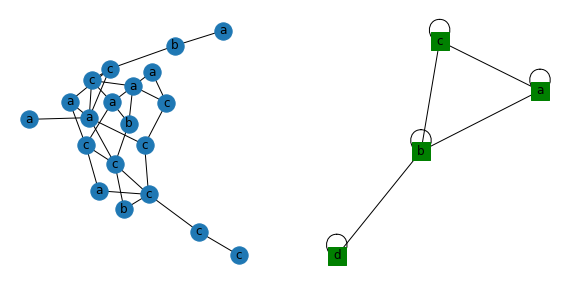

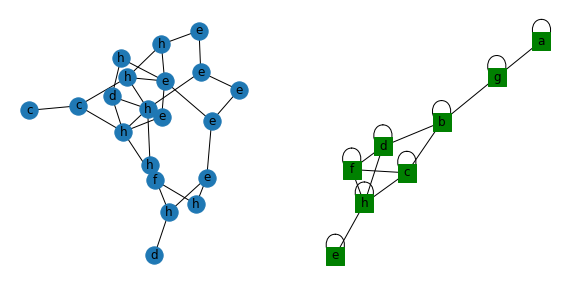

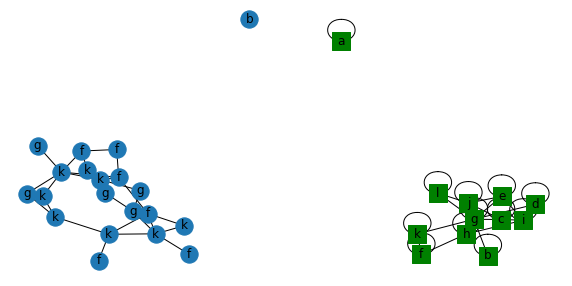

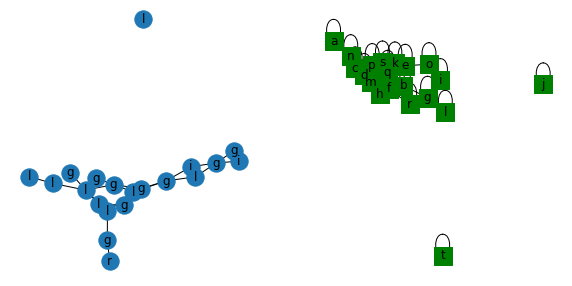

In [7]:
lv_ratios = [0.2, 0.4, 0.6, 1]
#fig, axs = plt.subplots(len(lv_ratios), figsize = (5, len(lv_ratios) * 5))

for i in range(len(lv_ratios)):
  G,S = generate_GS(v_size=20, lv_ratio=lv_ratios[i])
  draw_GS(G,S)

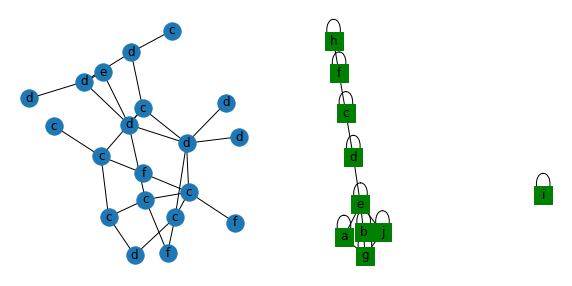

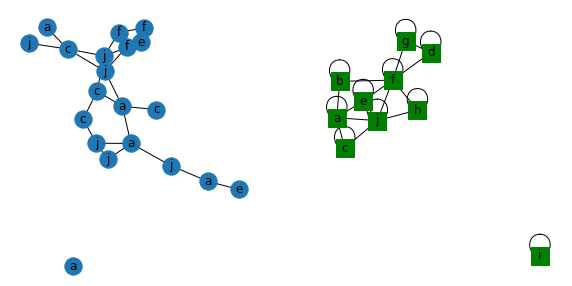

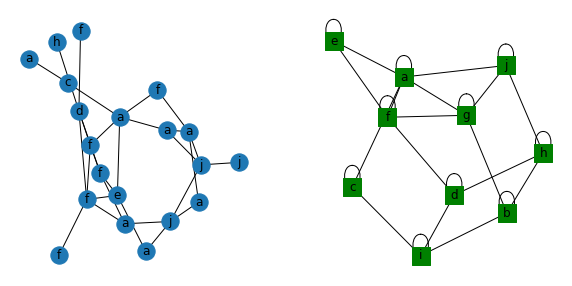

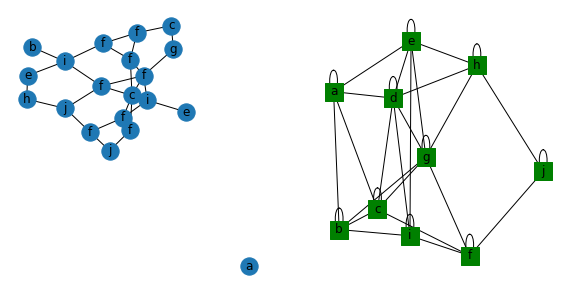

In [8]:
l_densities = [1, 1.5, 2, 3]

for i in range(len(l_densities)):
  G,S = generate_GS(v_size=20, l_density=l_densities[i])
  draw_GS(G,S)

# Graph generation

In [9]:
v_sizes = [20, 100, 500]
v_densities = [1, 2, 4]
lv_ratios = [0.2, 0.5, 1]
l_densities = [1, 2, 3]

#violation_ratios = [(0.08, 0.12), (0.18, 0.22), (0.27,0.33)]
violation_ratios = [(0.27,0.33)]
n=20

GT = pd.DataFrame(columns=["v_size", "v_density", "lv_ratio", "l_density",
                           "noise",
                           "G_opt", "S",
                           "G"
                           ])

for v_size in v_sizes:
  for v_density in v_densities:
    for lv_ratio in lv_ratios:
      for l_density in l_densities:
        for noise in violation_ratios:
          for i in range(n):
            
            # Generate ground truth
            try:
              G_opt,S = generate_GS(v_size, v_density, lv_ratio, l_density, budget=v_size)
            except TimeoutError:
              G_opt = None
              S = None
              G = None
            
            # Generate instance with injected violations
            if(G_opt != None):
              try:
                G = force_inject_violations(G_opt, S, *noise, budget=v_size)
              except TimeoutError:
                G=None

            row = {"v_size":v_size,
                  "v_density":v_density,
                  "lv_ratio":lv_ratio,
                  "l_density":l_density,
                  "noise": noise,
                  "G_opt":G_opt, "S":S,
                  "G":G
                  }
            GT = GT.append(row, ignore_index=True)

display(GT)

,v_size,v_density,lv_ratio,l_density,noise,G_opt,S,G
0,20,1,0.2,1,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,20,1,0.2,1,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,20,1,0.2,1,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,20,1,0.2,1,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,20,1,0.2,1,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...,...,...,...
1615,500,4,1,3,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1616,500,4,1,3,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1617,500,4,1,3,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1618,500,4,1,3,"(0.27, 0.33)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [11]:
GT.to_pickle('temp/dataset_GT.pickle')

In [12]:
GT.isna().sum()

v_size         0
v_density      0
lv_ratio       0
l_density      0
noise          0
G_opt        163
S            163
G            195
dtype: int64

In [13]:
GT.where(GT["G_opt"].isna()).dropna(subset="v_size")["l_density"].describe()

count     163
unique      2
top         3
freq      146
Name: l_density, dtype: int64

# Repair Generation

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
GT = pd.read_pickle("temp/dataset_GT.pickle")

In [ ]:
x = []
for i,r in GT.iterrows():
        #generate repairs
        R = repair(r["G"].copy(),r["S"])
        df = generate_all_repairs(r["G_opt"], r["S"], r["G"], R , steps=2*r["v_size"])
        df["noise"] = str(r["noise"])
        x.append(df.copy())
        
df = pd.concat(x)
df

In [ ]:
df.to_pickle("temp/generated_repairs.pickle")